In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
data = {
    "User_ID": range(1, 101),  # 100 synthetic users
    "Feedback": np.random.choice([
        "The recommendations need to be more diverse.",
        "I want more control over the types of recommendations I receive.",
        "It should be easier to see why a recommendation was made.",
        "There should be more options to customize the user interface.",
        "The recommendations are too similar to each other.",
        "I like how quickly it learns my preferences.",
        "The system is generally very intuitive and user-friendly.",
        "There needs to be a better way to give feedback on recommendations."
    ], 100)
}
df_feedback = pd.DataFrame(data)

In [4]:
# Vectorize the feedback for topic modeling
vectorizer = CountVectorizer(stop_words='english')
feedback_matrix = vectorizer.fit_transform(df_feedback['Feedback'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
topics = lda.fit_transform(feedback_matrix)

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics
display_topics(lda, vectorizer.get_feature_names_out(), 5)


Topic 0:
recommendation easier similar need diverse
Topic 1:
like quickly preferences learns similar
Topic 2:
recommendations way feedback needs better
Topic 3:
user intuitive friendly generally similar
Topic 4:
user interface customize options similar


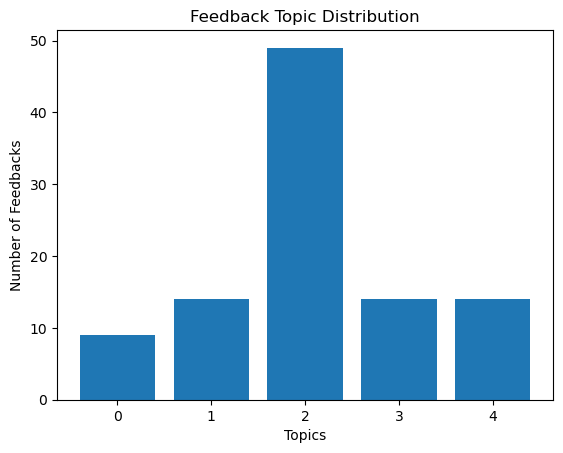

In [5]:
# Summarize topic distribution
topic_summaries = np.argmax(topics, axis=1)
topic_counts = np.bincount(topic_summaries)

# Plotting
plt.bar(range(len(topic_counts)), topic_counts)
plt.xlabel('Topics')
plt.ylabel('Number of Feedbacks')
plt.title('Feedback Topic Distribution')
plt.xticks(range(len(topic_counts)))
plt.show()

In [6]:
# Interpret and discuss the results
print("Summary of Feedback Topics:")
for i, count in enumerate(topic_counts):
    print(f"Topic {i} received {count} feedbacks, indicating {'a major' if count > np.mean(topic_counts) else 'a minor'} concern among users.")


Summary of Feedback Topics:
Topic 0 received 9 feedbacks, indicating a minor concern among users.
Topic 1 received 14 feedbacks, indicating a minor concern among users.
Topic 2 received 49 feedbacks, indicating a major concern among users.
Topic 3 received 14 feedbacks, indicating a minor concern among users.
Topic 4 received 14 feedbacks, indicating a minor concern among users.
